## Create Table

In [1]:
import sqlite3

conn = sqlite3.connect("Sales_data.db")
cursor = conn.cursor()

# creating orders table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Orders (
      order_id INTEGER PRIMARY KEY AUTOINCREMENT,
      order_date DATE NOT NULL,
      amount REAL NOT NULL,
      product_id INTEGER NOT NULL
    )
''')

sample_data = [
    ('2023-01-15', 100.50, 1),
    ('2023-01-20', 200.00, 2),
    ('2023-02-05', 150.75, 1),
    ('2023-02-10', 300.00, 3),
    ('2023-03-01', 50.25, 2),
    ('2024-01-10', 400.00, 1)
]

cursor.executemany("INSERT INTO Orders (order_date, amount, product_id) VALUES (?, ?, ?)", sample_data)

# commit the changes to the database permanently and close
conn.commit()
conn.close()

print("Database and order table created successfully!")

Database and order table created successfully!


## Create Query

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("Sales_data.db")

query = '''
    SELECT
      STRFTIME('%Y', order_date) AS year,
      STRFTIME('%m', order_date) AS month,
      SUM(amount) AS total_revenue,
      COUNT(DISTINCT order_id) AS order_volume
    FROM Orders
    GROUP BY STRFTIME('%Y', order_date), STRFTIME('%m', order_date)
    ORDER BY year, month;
'''

df = pd.read_sql_query(query, conn)

# conn.close()

print("Orders Summary:")
display(df)

Orders Summary:


,year,month,total_revenue,order_volume
0,2023,01,300.50,2
1,2023,02,450.75,2
2,2023,03,50.25,1
3,2024,01,400.00,1


In [3]:
# Top 3 Months by Sales
query = '''
    SELECT
      STRFTIME('%Y', order_date) AS year,
      STRFTIME('%m', order_date) AS month,
      SUM(amount) AS total_revenue,
      COUNT(DISTINCT order_id) AS order_volume
    FROM orders
    GROUP BY STRFTIME('%Y', order_date), STRFTIME('%m', order_date)
    ORDER BY total_revenue DESC
    LIMIT 3;

'''

df = pd.read_sql_query(query, conn)

print("Top 3 Months by Sales")
display(df)

conn.close()

Top 3 Months by Sales


,year,month,total_revenue,order_volume
0,2023,02,450.75,2
1,2024,01,400.00,1
2,2023,01,300.50,2


## Bar Chart

<Figure size 800x600 with 0 Axes>

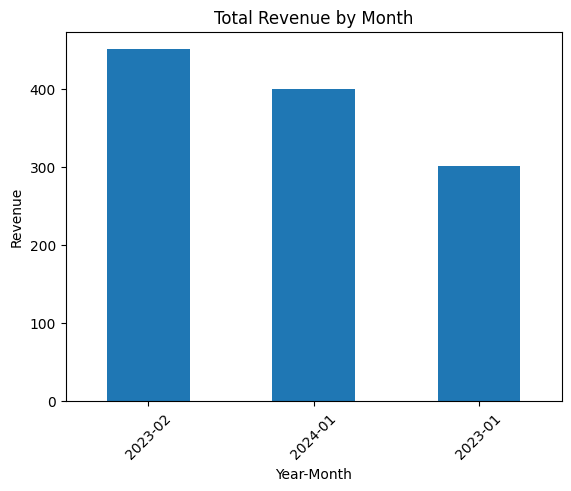

In [7]:
import matplotlib.pyplot as plt

# Create a combined year-month column
df['year_month'] = df['year'] + '-' + df['month']

# Create the bar chart
plt.figure(figsize=(8, 6))
df.plot(kind='bar', x='year_month', y='total_revenue', legend=False)
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.title("Total Revenue by Month")
plt.xticks(rotation=45)

# saving the image
plt.savefig("sales_chart.png")